## Esercizio 12.1

Per la classificazione delle immagini possono essere usate sia una rete DNN che una rete CNN.


Vogliamo creare una DNN in grado di riconoscere le 10 cifre decimali scritte a mano 

Per farlo utilizzeremo il dataset MNSIC, il quale contiene oltre 70.000 immagini da $28\times28$ pixel e ogni pixel puo assumere un 256 possibili graduazioni di grigio, corrisponendete a valori tra 0 e 255 , i nostri dati di input saranno pertanto collezioni di 28*28 numeri tra 0 e 255.

Tuttavia, bisogna prima riformattare la forma dei nostri array in delle matrici per poter utilizzare come funzione di costo la **categorical_crossentropy**



In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #carica i singoli pixel per le x

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


Useremo come optimizer **SGM** e come attivazione la **relu**. Inoltre per evitare l'overfitting utilizzeremo la tecnica del **Dropout**, consiste nel disattivare casualmente con una certa probabilita' alcuni neuroni. 

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax')) #layer che serve per convertire gli output ottenuti in delle probabilita normalizzate,
                                                        #la classe piu' probabile sara' quella proposta come risultato
    
    return model

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model


# training parameters
batch_size = 32
epochs = 30     #aumento il numero di epoche da 5 iniziali

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7598 - acc: 0.7766 - val_loss: 0.3101 - val_acc: 0.9163
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3808 - acc: 0.8917 - val_loss: 0.2379 - val_acc: 0.9317
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3116 - acc: 0.9126 - val_loss: 0.2012 - val_acc: 0.9431
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2710 - acc: 0.9226 - val_loss: 0.1734 - val_acc: 0.9500
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2361 - acc: 0.9341 - val_loss: 0.1571 - val_acc: 0.9534
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2122 - acc: 0.9404 - val_loss: 0.1430 - val_acc: 0.9577
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1935 - acc: 0.9451 - val_loss: 0.1308 - val_acc: 0.9597
Epoch 8/30
1875/1875 [==============================] - 5s 3ms

## Andamento della Loss e della Accurancy ##

313/313 [==============================] - 1s 2ms/step - loss: 0.0653 - acc: 0.9790

Test loss: 0.06525100022554398
Test accuracy: 0.9789999723434448


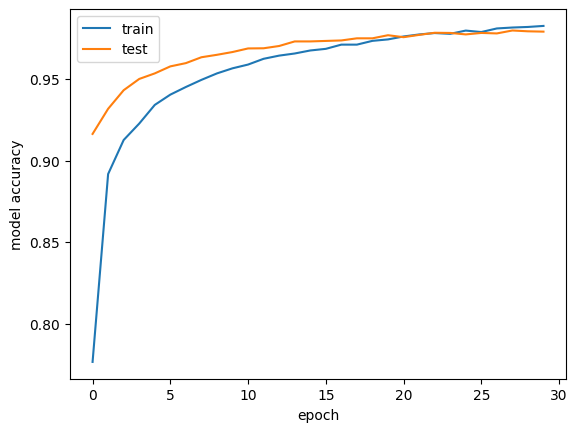

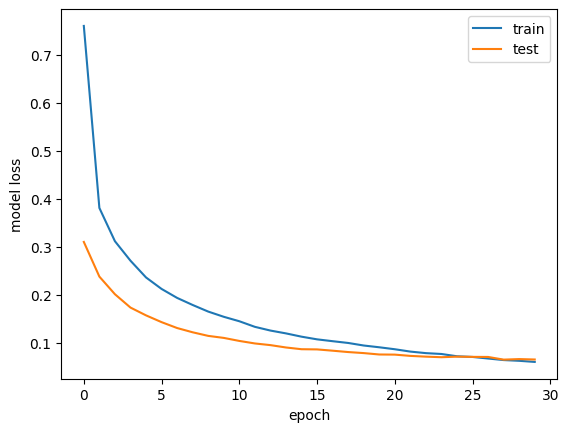

In [6]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Test della rete ##

313/313 [==============================] - 1s 1ms/step


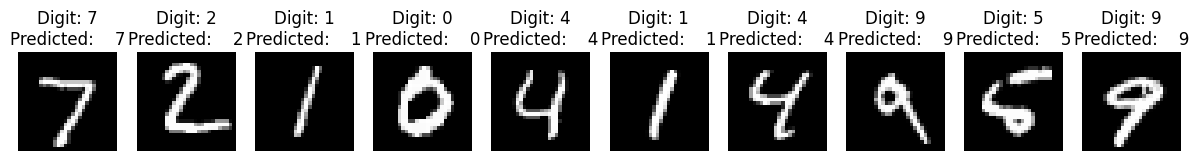

In [7]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Prova con Adam come optimizer ##

In [8]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #carica i singoli pixel per le x



# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)


# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)




from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model


# training parameters
batch_size = 32
epochs = 30     #aumento il numero di epoche da 5 iniziali

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))



Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2780 - acc: 0.9183 - val_loss: 0.1101 - val_acc: 0.9677
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1208 - acc: 0.9649 - val_loss: 0.0997 - val_acc: 0.9713
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0854 - acc: 0.9754 - val_loss: 0.0788 - val_acc: 0.9756
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0687 - acc: 0.9794 - val_loss: 0.0810 - val_acc: 0.9780
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0563 - acc: 0.9827 - val_loss: 0.0851 - val_acc: 0.9773
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0476 - acc: 0.9850 - val_loss: 0.0687 - val_acc: 0.9830
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0399 - acc: 0.9879 - val_loss: 0.0938 - val_acc: 0.9790
Epoch 8/30
1875/1875 [==============================] - 8s 4ms

313/313 [==============================] - 1s 2ms/step - loss: 0.1519 - acc: 0.9822

Test loss: 0.15193064510822296
Test accuracy: 0.982200026512146


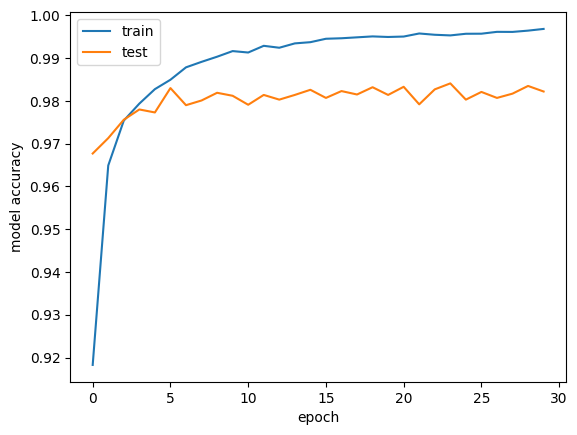

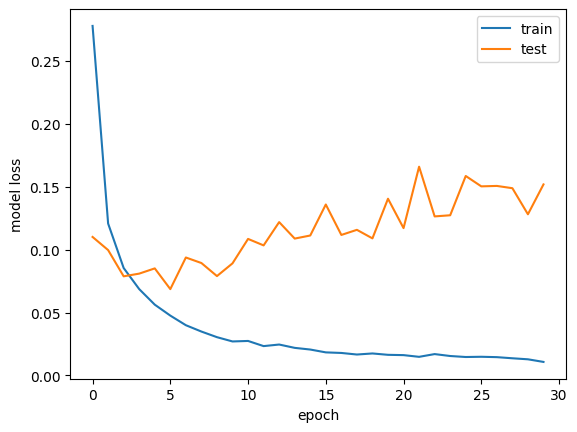

In [9]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


L'utilizzo dell'optimizer Adam causa un aumento del tempo necessario per completare una singola epoca, passando da 5s a 8s per epoca, inoltre si assiste a un aumento della **test_loss** dopo 5 epoche suggerendo una possibile situazione di overfitting

# Esercizio 12.2 - Rete Convoluzionale #

Una rete convoluzionale e' caratterizzata da due tipi di Layer:

1.  Layer Convoluzionale:
      Sono layer caratterizzati da una serie di filtri applicati attraverso delle superfici, i kernel, le quali hanno delle dimesioni specifiche: il loro scopo e' quello di catturare la presenza di pattern locali

2. Layer di MaxPooling:
    Sono layer che vanno a ridurre le dimensioni spaziali dei prodotti dei layer convoluzionali andando a suddividere l'outuput in delle finestre di dimensione pool_size e  mantenendo all'interno di queste solamente i pattern rilevanti.
    In particolare il MaxPooling lavora andando a mantenere solo il valore massimo presente nella finestra di lavoro

Il layer Conv2D e' caratterizzato da (height, width), nel nostro caso i nostri pixel, e da il numero di canali, nel nostro caso 1 dato che abbiamo solo una scala di grigi per ogni pixel
            

In [10]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [11]:

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(10, kernel_size=(5, 5),        # Aggiungo layer
                     activation='relu', 
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())  ## mi serve per poter passare l'output ottenuto a un neurone Dense
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))              
    model.add(Dense(num_classes, activation='softmax'))   # Funzione di attivazione softmax
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [12]:
# training parameters
batch_size = 32
epochs = 30

# create the deep conv net
model_CNN=create_CNN()

# train CNN

# train DNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))






Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 1.1301 - acc: 0.6123 - val_loss: 0.2988 - val_acc: 0.9107
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4493 - acc: 0.8602 - val_loss: 0.1741 - val_acc: 0.9473
Epoch 3/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3361 - acc: 0.8977 - val_loss: 0.1348 - val_acc: 0.9583
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2803 - acc: 0.9155 - val_loss: 0.1102 - val_acc: 0.9651
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2494 - acc: 0.9238 - val_loss: 0.0970 - val_acc: 0.9703
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2288 - acc: 0.9297 - val_loss: 0.0896 - val_acc: 0.9708
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2107 - acc: 0.9369 - val_loss: 0.0821 - val_acc: 0.9745
Epoch 8/30
1875/1875 [==============================] -

313/313 [==============================] - 3s 10ms/step - loss: 0.0482 - acc: 0.9861

Test loss: 0.048230599611997604
Test accuracy: 0.9861000180244446


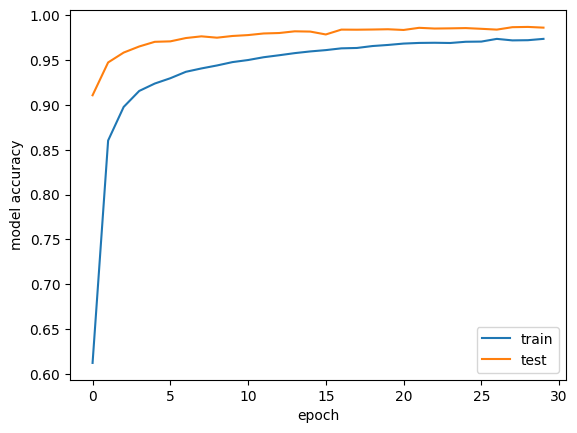

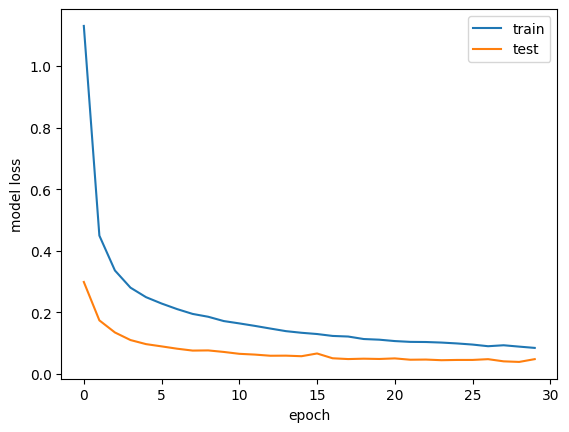

In [13]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 3s 9ms/step


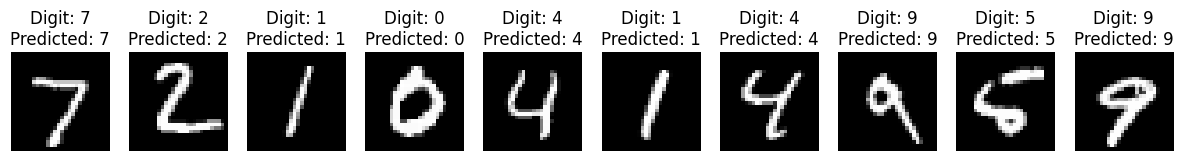

In [14]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Utilizzo della rete su numeri scritti a mano

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 64ms/step


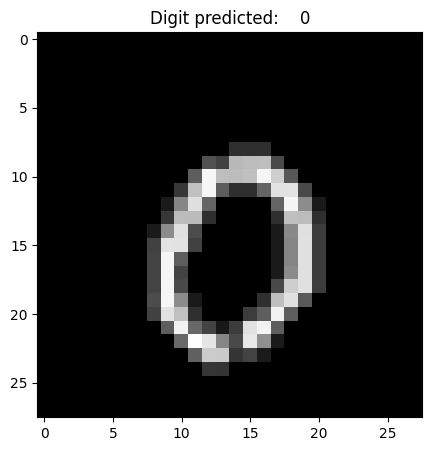

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 15ms/step


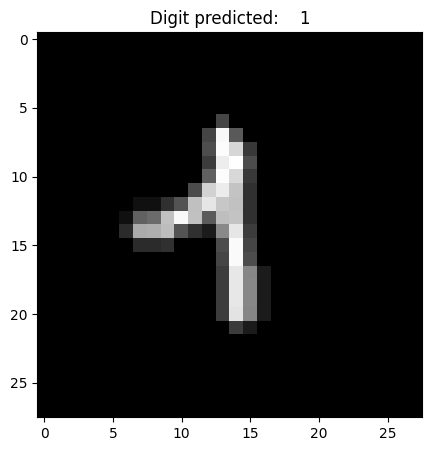

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 22ms/step


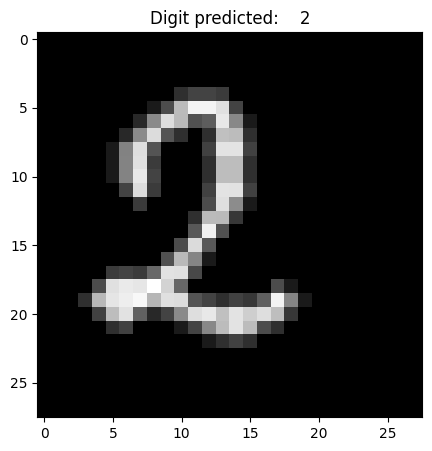

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 17ms/step


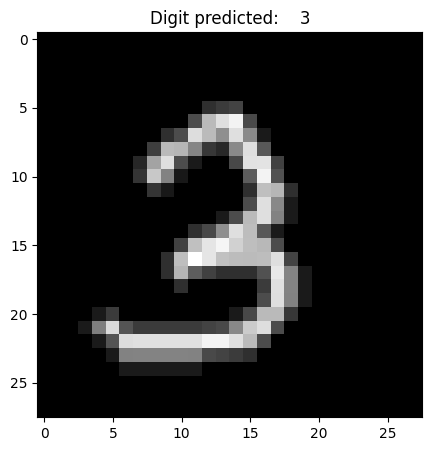

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 19ms/step


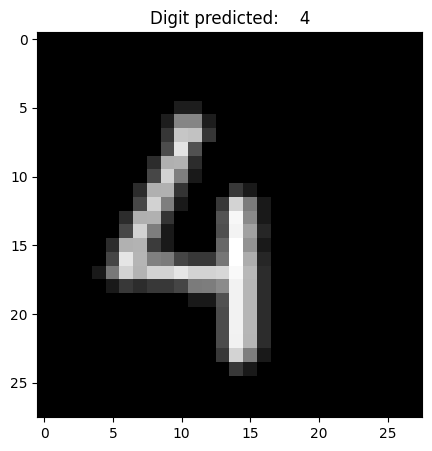

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 22ms/step


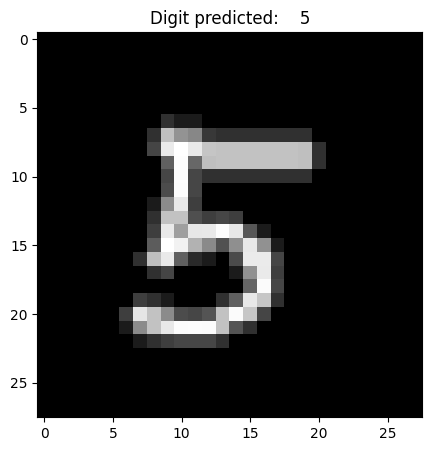

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 14ms/step


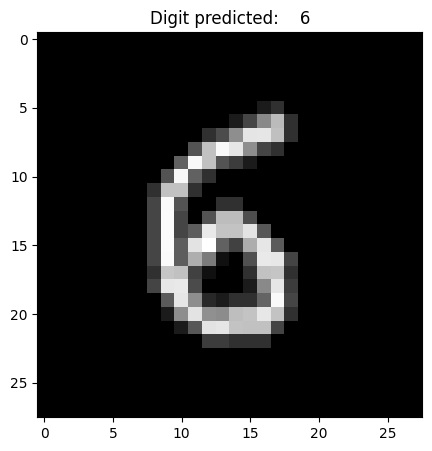

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 16ms/step


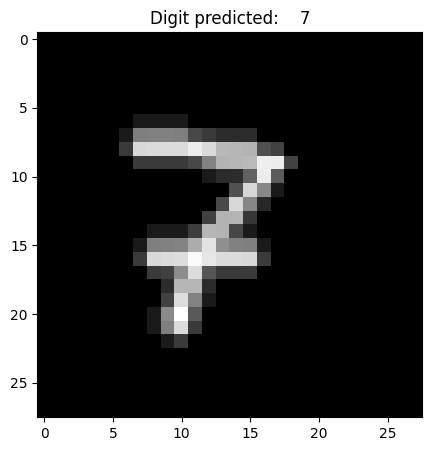

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 19ms/step


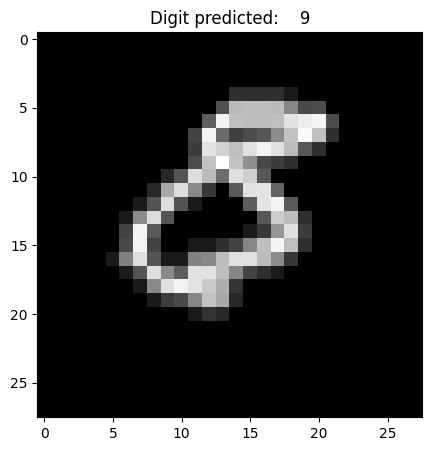

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 16ms/step


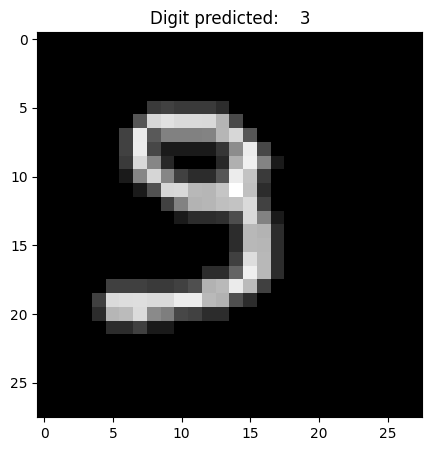

In [15]:
from PIL import Image
import os

import numpy as np

def digit(filename):
    digit_in = Image.open(filename).convert('L')

    ydim, xdim = digit_in.size
    print("Image size: " + str(xdim) + "x" + str(ydim))

    pix = digit_in.load()
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i, j] = pix[j, i]

    data /= 255

    print(data.shape)

    data = data.reshape(1, xdim, ydim, 1)    # reshape data for CNN model
    print(data.shape)
    
    pred_0 = model_CNN.predict(data)   # model prediction

    data = data.reshape(xdim, ydim)   # reshape for printing the image

    plt.figure(figsize=(5, 5))
    plt.imshow(data, cmap='gray')
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.show()

# process digit from 0 to 9
for i in range(10):
    digit_filename = "Number/{}.png".format(i)
    digit(digit_filename)


Come possiamo notare la rete ha difficolta' a riconoscere il numero **8**, cio' potrebbe essere spiegato con il fatto che nel disegno proposto non e' ben evidente il cerchio superiore, il quale potrebbe essere stato scelto dalla rete come patter ricorrente del numero 8.